In [1]:
# for database connections
import sqlalchemy
from sqlalchemy import create_engine, inspect, text

# data
import pandas as pd
import numpy as np

# viz
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SQL_USERNAME = "postgres"
SQL_PASSWORD = "Ollie!0515" # change this
SQL_IP = "localhost"
PORT = 5432
DATABASE = "Project_2_group_08" # change this

In [3]:
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string)

In [4]:
# explore and understand the data

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within each table and its types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
        
    print()

contacts
contact_id INTEGER
first_name VARCHAR(30)
last_name VARCHAR(30)
email VARCHAR(100)

campaign
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(100)
description VARCHAR(100)
goal DOUBLE PRECISION
pledged DOUBLE PRECISION
outcome VARCHAR(20)
backers_count INTEGER
country VARCHAR(10)
currency VARCHAR(10)
launch_date TIMESTAMP
end_date TIMESTAMP
category_id VARCHAR(20)
subcategory_id VARCHAR(20)

category
category_id VARCHAR(20)
category VARCHAR(50)

subcategory
subcategory_id VARCHAR(20)
subcategory VARCHAR(50)



In [ ]:
#sabina query

In [ ]:
#seven query

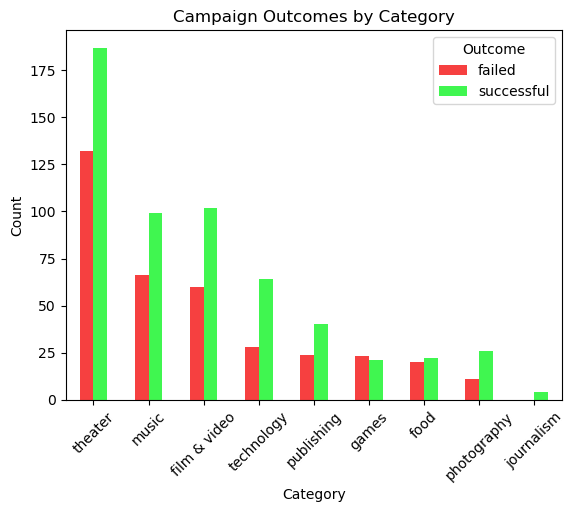

In [19]:
#hannah query

# Loading data from the Category and Campaign tables
category_df = pd.read_sql_query("SELECT * FROM category", engine)
campaign_df = pd.read_sql_query("SELECT * FROM campaign", engine)

# Merge the dataframes on category_id
merged_df = pd.merge(campaign_df, category_df, on='category_id')

#filtering out canceled and live rows 
filtered_viz = merged_df[~merged_df['outcome'].isin(['canceled', 'live'])]

# Group by category and outcome and count occurrences
outcome_counts = filtered_viz.groupby(['category', 'outcome']).size().unstack(fill_value=0)

# Sort the data in descending order by total count
outcome_counts['total'] = outcome_counts.sum(axis=1)
outcome_counts = outcome_counts.sort_values(by='total', ascending=False)
outcome_counts = outcome_counts.drop(columns='total')  # Drop the total column after sorting

# Define custom colors
colors = ['#F64040', '#40F650']  # Example colors for each outcome

# Plot the data
ax = outcome_counts.plot(kind='bar', stacked=False, color=colors)

# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Campaign Outcomes by Category')
plt.xticks(rotation=45)
plt.legend(title='Outcome')

#saving as png just bc
plt.savefig('overall_campaign_outcomes.png')

# Show the plot

plt.show()
